In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [3]:
records = 10
data = []

In [4]:
with open('Dataset/endomondoHR_proper.json') as f:
    for record_counter, l in enumerate(f):
        data.append(eval(l))
        if record_counter >= records:
            break

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/endomondoHR_proper.json'

In [50]:
df = pd.DataFrame(data)

In [51]:
df.head()

,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....",male,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535,"[60.173348765820265, 60.173239801079035, 60.17...","[24.64977040886879, 24.65014273300767, 24.6509...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877...",https://www.endomondo.com/users/10921915/worko...,10921915
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....",male,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038,"[60.173247596248984, 60.17320962622762, 60.172...","[24.649855233728886, 24.65015547350049, 24.650...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170...",https://www.endomondo.com/users/10921915/worko...,10921915
2,"[76.4, 73.2, 72.4, 73.0, 73.0, 70.8, 69.2, 69....",male,"[99, 105, 113, 110, 109, 110, 108, 121, 116, 1...",389643739,"[60.17326201312244, 60.173205351457, 60.172969...","[24.64995657093823, 24.650197718292475, 24.651...","[4.0464, 13.8204, 16.9776, 19.9404, 28.7856, 3...",bike,"[1407858459, 1407858466, 1407858478, 140785849...",https://www.endomondo.com/users/10921915/worko...,10921915
3,"[28.6, 29.4, 29.4, 29.4, 28.0, 27.0, 25.2, 23....",male,"[99, 105, 113, 109, 112, 116, 116, 114, 114, 1...",386729739,"[60.173286236822605, 60.17323946580291, 60.173...","[24.649874344468117, 24.650242729112506, 24.65...","[7.4988, 15.4008, 17.8668, 21.5712, 24.1416, 3...",bike,"[1407432042, 1407432048, 1407432056, 140743206...",https://www.endomondo.com/users/10921915/worko...,10921915
4,"[32.0, 32.0, 32.0, 35.8, 36.2, 36.2, 36.2, 36....",male,"[110, 113, 114, 116, 123, 126, 129, 135, 137, ...",383186560,"[60.17329327762127, 60.17327332869172, 60.1732...","[24.64979832060635, 24.64992195367813, 24.6500...",NaN,bike (transport),"[1406909434, 1406909436, 1406909437, 140690943...",https://www.endomondo.com/users/10921915/worko...,10921915


In [38]:
df.to_csv('Dataset/sample.csv', index=False, header=False)

In [7]:
df.to_json(r'Dataset/sample.json', orient='records')

In [46]:
df.shape

(51, 11)

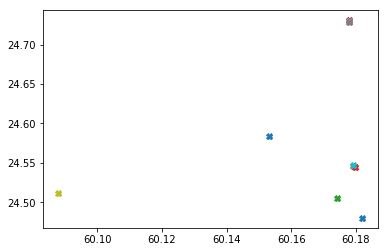

In [56]:
for val in df.iterrows():
    lat = list(val[1].latitude)
    lon = list(val[1].longitude)
    
    avg_lat = sum(lat) / len(lat)
    avg_lon = sum(lon) / len(lon)
    
#     plt.plot(lat, lon)
#     plt.scatter(lat[0], lon[0])
    
    plt.plot(avg_lat, avg_lon, marker="X")
    

In [3]:
clean_df = pd.read_json('Dataset/clean_feature.json', lines=True)
clean_df.head()

,gender,heart_rate,id,lat,lon,speed,sport,userId
0,female,0.0,490077540,23.401958,120.174270,0.0,bike,1040960
1,female,0.0,423547356,23.254675,120.209114,0.0,bike,1040960
2,female,0.0,460371302,23.246359,120.341980,0.0,bike,1040960
3,female,0.0,423547900,23.219341,120.352325,0.0,bike,1040960
4,female,0.0,432926410,23.667118,120.362260,0.0,bike,1040960


In [4]:
clean_df.shape

(167783, 8)

In [5]:
clean_df.describe()

,heart_rate,id,lat,lon,speed,userId
count,167783.000000,1.677830e+05,167783.000000,167783.000000,167783.000000,1.677830e+05
mean,138.707878,3.614781e+08,42.973643,12.009657,3.957165,4.565819e+06
std,18.961298,1.571586e+08,20.652264,49.691062,8.993335,3.906677e+06
min,-800.836000,2.579360e+05,-51.418694,-159.997830,0.000000,6.900000e+01
25%,128.440000,2.581375e+08,39.559109,-0.368891,0.000000,1.483178e+06
50%,140.096000,3.539223e+08,50.365105,11.050133,0.000000,3.365457e+06
75%,150.710000,4.787096e+08,55.656042,19.767941,0.000000,6.919744e+06
max,239.000000,6.740080e+08,69.664510,177.334580,74.857840,1.548142e+07


In [10]:
clean_df.loc[clean_df.id == 381185226]

,gender,heart_rate,id,lat,lon,speed,sport,userId
156496,male,166.084,381185226,60.17805,24.729868,29.59229,bike (transport),10921915


In [11]:
clean_df.sport.unique()

array(['bike', 'run', 'walk', 'fitness walking', 'cross-country skiing',
       'hiking', 'core stability training', 'bike (transport)',
       'mountain bike', 'kayaking', 'indoor cycling', 'circuit training',
       'swimming', 'weight training', 'roller skiing', 'horseback riding',
       'rowing', 'skate', 'orienteering', 'snowshoeing', 'aerobics',
       'gymnastics', 'downhill skiing', 'snowboarding', 'stair climing',
       'martial arts', 'soccer', 'golf', 'pilates', 'treadmill running',
       'tennis', 'badminton', 'basketball', 'elliptical', 'climbing',
       'windsurfing', 'rugby', 'squash', 'kite surfing', 'sailing',
       'treadmill walking', 'table tennis', 'yoga'], dtype=object)

In [12]:
clean_df.sport.unique()

array(['bike', 'run', 'walk', 'fitness walking', 'cross-country skiing',
       'hiking', 'core stability training', 'bike (transport)',
       'mountain bike', 'kayaking', 'indoor cycling', 'circuit training',
       'swimming', 'weight training', 'roller skiing', 'horseback riding',
       'rowing', 'skate', 'orienteering', 'snowshoeing', 'aerobics',
       'gymnastics', 'downhill skiing', 'snowboarding', 'stair climing',
       'martial arts', 'soccer', 'golf', 'pilates', 'treadmill running',
       'tennis', 'badminton', 'basketball', 'elliptical', 'climbing',
       'windsurfing', 'rugby', 'squash', 'kite surfing', 'sailing',
       'treadmill walking', 'table tennis', 'yoga'], dtype=object)

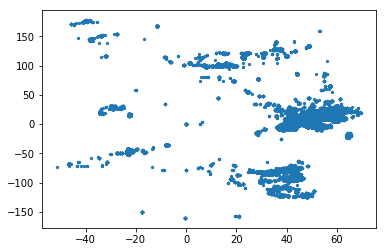

In [16]:
plt.scatter(clean_df.loc[:, 'lat'], clean_df.loc[:, 'lon'], s=5)

In [28]:
model = KMeans(n_clusters=6)
model.fit(clean_df.loc[:, ['lat', 'lon']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
model.cluster_centers_

array([[ 54.11834758,  15.73213619],
       [ 20.05908392, 106.77277172],
       [ 37.50810277, -89.37194383],
       [ 46.82621795,  -1.04528612],
       [-36.83479943, 163.7011262 ],
       [-25.51722023,  -7.82805834]])

In [40]:
X = clean_df.loc[:, ['lat', 'lon']]

In [36]:
predictions = model.predict(clean_df.loc[:, ['lat', 'lon']])

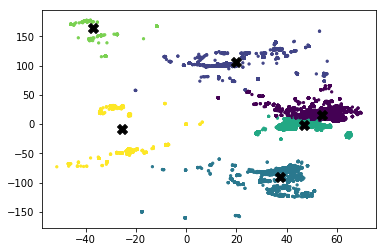

In [38]:
plt.scatter(clean_df.loc[:, 'lat'], clean_df.loc[:, 'lon'], c=predictions, s=5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="X", s=100, c='black')

Text(0.5, 1.0, 'Elbow method using inertia_')

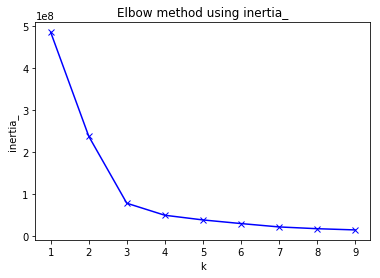

In [47]:
# distortions = []
inertias_ = []

k_range = range(1, 10)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=88)
    model.fit(X)
    inertias_.append(model.inertia_)
    # distortions.append(sum(np.min(distance.cdist(X.values, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
plt.plot(k_range, inertias_, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia_')
plt.title('Elbow method using inertia_')

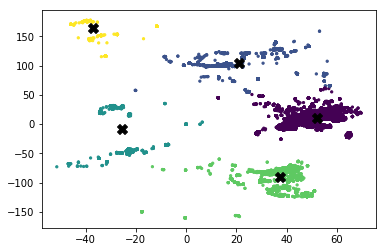

In [51]:
model = KMeans(n_clusters=5, random_state=88)
model.fit(X)
predictions = model.predict(clean_df.loc[:, ['lat', 'lon']])

plt.scatter(clean_df.loc[:, 'lat'], clean_df.loc[:, 'lon'], c=predictions, s=5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="X", s=100, c='black')

In [6]:
with open('Dataset/endomondoMeta.json') as f:
    for record_counter, l in enumerate(f):
        data.append(eval(l))
        if record_counter >= records:
            break
data

[{'speed': [6.8652,
   16.4736,
   19.1988,
   20.4804,
   31.3956,
   31.8096,
   24.39,
   23.346,
   26.2368,
   28.4868,
   28.4868,
   27.6624,
   24.8688,
   25.794,
   14.0868,
   23.346,
   26.4168,
   31.8096,
   32.1084,
   32.274,
   30.9672,
   29.0016,
   27.5436,
   34.6464,
   31.6404,
   30.3696,
   26.4816,
   26.8128,
   26.172,
   24.1956,
   33.9804,
   29.4048,
   21.2112,
   19.4328,
   27.3456,
   29.6784,
   33.5988,
   23.4864,
   21.7512,
   29.7936,
   31.1256,
   32.58,
   32.8608,
   30.0276,
   28.5192,
   29.7324,
   21.0744,
   19.8756,
   19.7712,
   19.1304,
   18.486,
   23.3892,
   25.6068,
   27.5364,
   25.83,
   29.8764,
   23.2416,
   19.3788,
   17.892,
   16.2864,
   15.0408,
   14.6952,
   15.192,
   14.7816,
   18.918,
   25.83,
   30.204,
   35.8488,
   41.2632,
   43.1172,
   43.5888,
   41.9328,
   31.1544,
   25.3296,
   25.3044,
   27.828,
   21.7836,
   21.006,
   23.2596,
   31.7556,
   13.7628,
   17.5536,
   20.9088,
   19.7748,
   1